## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import datetime as datetime
import math as math

## Import data

In [2]:
df = pd.read_csv(os.path.join('data','bitstampUSD_data.csv'), usecols=('Timestamp', 'Weighted_Price'))

In [3]:
df.head()

,Timestamp,Weighted_Price
0,1325317920,4.39
1,1325317980,NaN
2,1325318040,NaN
3,1325318100,NaN
4,1325318160,NaN


## Data wrangling

In [4]:
good_data_starts = 1498888800

In [5]:
df = df[df['Timestamp']>good_data_starts].reset_index()

In [6]:
def posornan(x):
    if x == 0:
        return np.nan
    else:
        return x

In [7]:
num_of_samples = len(df) # 1000000
q_verbose = num_of_samples/25

# init
naninds = list()
nantimes = list()
nanhtimes = list()
nonnaninds = list()
nonnantimes = list()
nonnanhtimes = list()
nonnanprices = list()
dig1 = list()
dig12 = list()
dig2 = list()
dig3 = list()
dig4 = list()
dig5 = list()
dig6 = list()

subsample = np.linspace(1, len(df), num_of_samples)
numsample = len(subsample)

for x in range(numsample):
    i = int(math.floor(subsample[x])-1)
    
    if q_verbose > 0:
        if x % q_verbose == 0:
            print('sample # ' + str(x) + ' of ' + str(numsample))
            
    this_Timestamp = df['Timestamp'][i]
    this_hTimestamp = datetime.datetime.fromtimestamp(this_Timestamp)
    this_price = df['Weighted_Price'][i]
    is_nan = np.isnan(this_price)
    
    if is_nan:
        naninds.append(i)
        nantimes.append(this_Timestamp)
        nanhtimes.append(this_hTimestamp)
    else:
        nonnaninds.append(i)
        nonnantimes.append(this_Timestamp)
        nonnanhtimes.append(this_hTimestamp)        
        dig1.append(int(posornan(str(this_price*100)[0:1])))
        dig12.append(int(posornan(str(this_price*100)[0:2])))
        dig2.append(int(posornan(str(this_price*10000000000)[1:2])))
        dig3.append(int(posornan(str(this_price*10000000000)[2:3])))
        dig4.append(int(posornan(str(this_price*10000000000)[3:4])))
        dig5.append(int(posornan(str(this_price*10000000000)[4:5])))
        dig6.append(int(posornan(str(this_price*10000000000)[5:6])))
        nonnanprices.append(this_price)

dfnan = pd.DataFrame()
dfnan['inds'] = naninds
dfnan['times'] = nantimes
dfnan['htimes'] = nanhtimes

dfx = pd.DataFrame()
dfx['inds'] = nonnaninds
dfx['times'] = nonnantimes
dfx['htimes'] = nonnanhtimes
dfx['prices'] = nonnanprices
dfx['dig1'] = dig1
dfx['dig2'] = dig2
dfx['dig12'] = dig12
dfx['dig3'] = dig3
dfx['dig4'] = dig4
dfx['dig5'] = dig5
dfx['dig6'] = dig6

sample # 0 of 1841400
sample # 73656 of 1841400
sample # 147312 of 1841400
sample # 220968 of 1841400
sample # 294624 of 1841400
sample # 368280 of 1841400
sample # 441936 of 1841400
sample # 515592 of 1841400
sample # 589248 of 1841400
sample # 662904 of 1841400
sample # 736560 of 1841400
sample # 810216 of 1841400
sample # 883872 of 1841400
sample # 957528 of 1841400
sample # 1031184 of 1841400
sample # 1104840 of 1841400
sample # 1178496 of 1841400
sample # 1252152 of 1841400
sample # 1325808 of 1841400
sample # 1399464 of 1841400
sample # 1473120 of 1841400
sample # 1546776 of 1841400
sample # 1620432 of 1841400
sample # 1694088 of 1841400
sample # 1767744 of 1841400


In [8]:
print(len(dfx))
dfx.head()

1789999


,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
0,1,1498888920,2017-07-01 00:02:00,2468.830000,2,4,24,6,8,8,3
1,2,1498888980,2017-07-01 00:03:00,2474.003084,2,4,24,7,4,0,0
2,3,1498889040,2017-07-01 00:04:00,2472.990000,2,4,24,7,2,9,8
3,4,1498889100,2017-07-01 00:05:00,2471.431653,2,4,24,7,1,4,3
4,5,1498889160,2017-07-01 00:06:00,2472.680559,2,4,24,7,2,6,8


In [9]:
print(len(dfx))
dfx.tail()

1789999


,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
1789994,1841395,1609372560,2020-12-30 16:56:00,28806.429798,2,8,28,8,0,6,4
1789995,1841396,1609372620,2020-12-30 16:57:00,28846.441863,2,8,28,8,4,6,4
1789996,1841397,1609372680,2020-12-30 16:58:00,28879.056266,2,8,28,8,7,9,0
1789997,1841398,1609372740,2020-12-30 16:59:00,28893.695831,2,8,28,8,9,3,6
1789998,1841399,1609372800,2020-12-30 17:00:00,28909.166061,2,8,28,9,0,9,1


In [10]:
print(len(dfnan))
dfnan.head()

51401


,inds,times,htimes
0,0,1498888860,2017-07-01 00:01:00
1,15,1498889760,2017-07-01 00:16:00
2,17,1498889880,2017-07-01 00:18:00
3,24,1498890300,2017-07-01 00:25:00
4,27,1498890480,2017-07-01 00:28:00


In [11]:
dfx['dig4'] = dig4

## Where are the NaNs? 

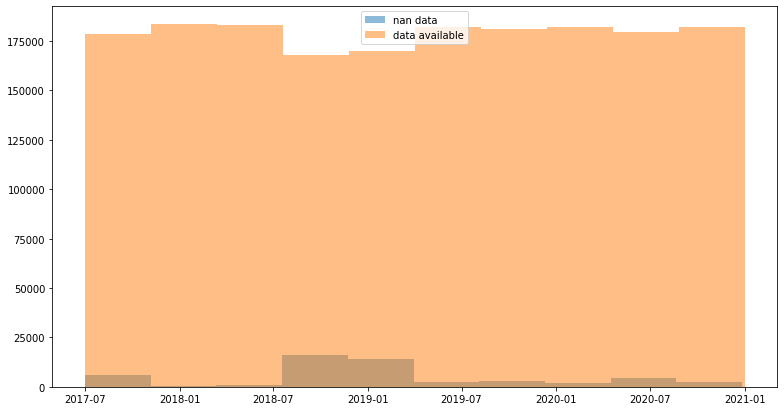

In [12]:
f = plt.figure(figsize=(13,7), facecolor='w')
tr_nan = plt.hist(dfnan['htimes'], alpha=0.5)
tr_nonnan = plt.hist(dfx['htimes'], alpha=0.5)
plt.legend(('nan data', 'data available'));

Unexpectedly lots of NaNs thorugh 2017. I'm going to make a (possibly unsound) assumption that the availability of data is statistically independent of the first digits (and vice versa)

In [13]:
good_data_starts = 1498888800

In [14]:
dfx[dfx['times']> good_data_starts]

,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
0,1,1498888920,2017-07-01 00:02:00,2468.830000,2,4,24,6,8,8,3
1,2,1498888980,2017-07-01 00:03:00,2474.003084,2,4,24,7,4,0,0
2,3,1498889040,2017-07-01 00:04:00,2472.990000,2,4,24,7,2,9,8
3,4,1498889100,2017-07-01 00:05:00,2471.431653,2,4,24,7,1,4,3
4,5,1498889160,2017-07-01 00:06:00,2472.680559,2,4,24,7,2,6,8
...,...,...,...,...,...,...,...,...,...,...,...
1789994,1841395,1609372560,2020-12-30 16:56:00,28806.429798,2,8,28,8,0,6,4
1789995,1841396,1609372620,2020-12-30 16:57:00,28846.441863,2,8,28,8,4,6,4
1789996,1841397,1609372680,2020-12-30 16:58:00,28879.056266,2,8,28,8,7,9,0
1789997,1841398,1609372740,2020-12-30 16:59:00,28893.695831,2,8,28,8,9,3,6


## Glance at the trace

In [15]:
## Glance at the trace

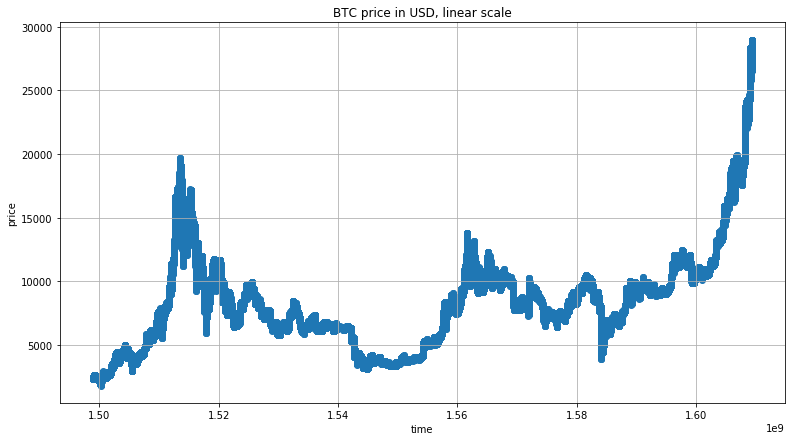

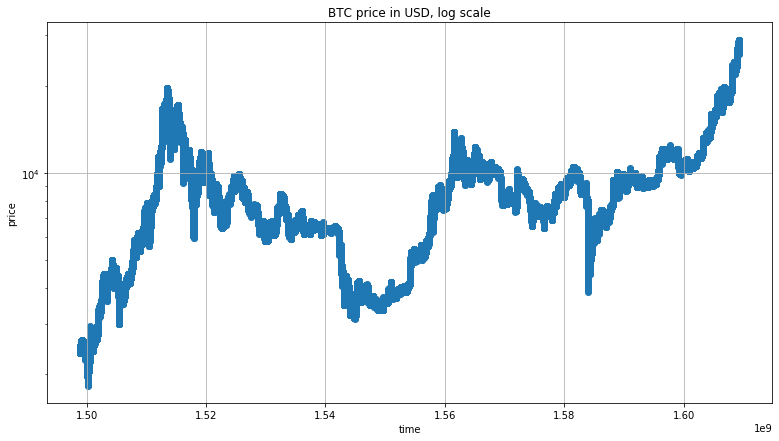

In [16]:
f = plt.figure(figsize=(13,7), facecolor='w')
plt.scatter(dfx['times'], dfx['prices'])
plt.xlabel('time')
plt.ylabel('price')
plt.title('')
plt.grid('on')
plt.yscale('linear')
plt.title('BTC price in USD, linear scale')

f = plt.figure(figsize=(13,7), facecolor='w')
plt.scatter(dfx['times'], dfx['prices'])
plt.xlabel('time')
plt.ylabel('price')
plt.title('')
plt.grid('on')
plt.yscale('log')
plt.title('BTC price in USD, log scale');

## What is the digit distribution?
Suppose bitcoin's price was a random, then over multiple orders of magnitude the distribution of each digit should be uniform. In other words, the price is just as likely to be something that starts with a "7" as 

### Leading digit

In [17]:
bins = range(1,11)

digs = list()
counts1 = list()
counts2 = list()

for bi in range(1,len(bins)):
    digs.append(bi)
    count1 = len(dfx[dfx['dig1']==bi])
    counts1.append(count1)
    count2 = len(dfx[dfx['dig2']==bi])
    counts2.append(count2)
    print('Leading digit: "' + str(bi) + '" has ' + str(count1) + ' instances ... (and ' + str(count2) + ' as 2nd digit)')

Leading digit: "1" has 434840 instances ... (and 263640 as 2nd digit)
Leading digit: "2" has 66768 instances ... (and 172452 as 2nd digit)
Leading digit: "3" has 179865 instances ... (and 203248 as 2nd digit)
Leading digit: "4" has 98187 instances ... (and 158057 as 2nd digit)
Leading digit: "5" has 91606 instances ... (and 166579 as 2nd digit)
Leading digit: "6" has 243683 instances ... (and 147627 as 2nd digit)
Leading digit: "7" has 217913 instances ... (and 149622 as 2nd digit)
Leading digit: "8" has 214152 instances ... (and 139311 as 2nd digit)
Leading digit: "9" has 242985 instances ... (and 128614 as 2nd digit)


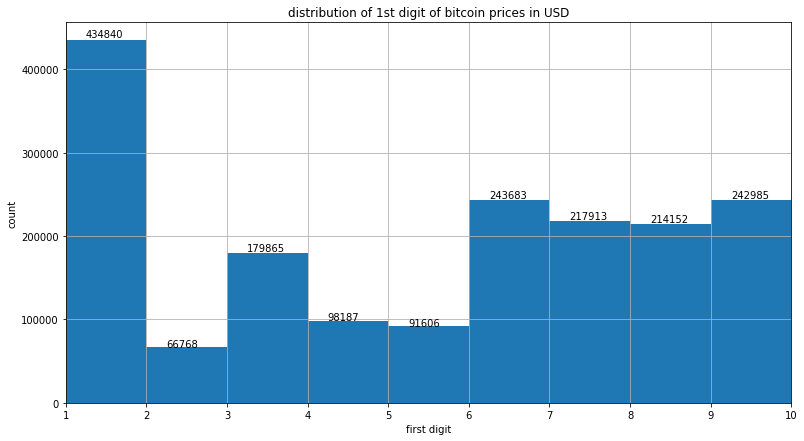

In [18]:
f = plt.figure(figsize=(13,7), facecolor='w')
tr_nan = plt.hist(dfx['dig1'], bins = bins)
plt.xlabel('first digit')
plt.ylabel('count')
plt.title('distribution of 1st digit of bitcoin prices in USD')
plt.grid('on')
plt.xlim((1,10));

for x in range(len(digs)):
    plt.text(digs[x]+0.25, counts1[x]*1.01, str(counts1[x]))

The above plot shows us that, for example, there were nearly 1600000 instances that the price started with a '1', and only about 650000 instances where the price started with a '7'

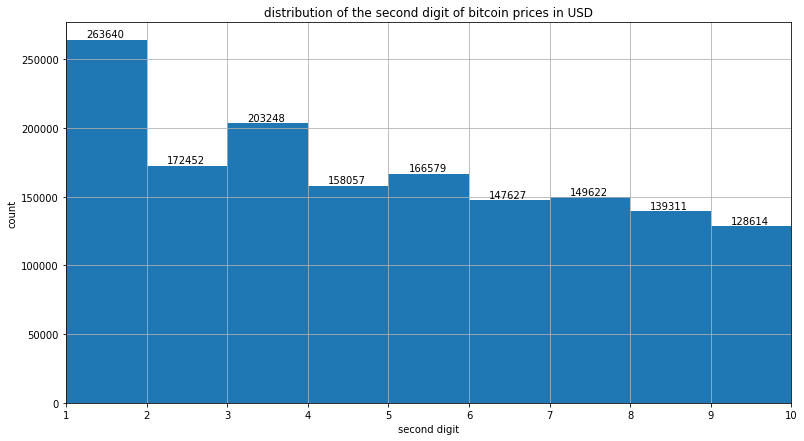

In [19]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig2'], bins = bins)
plt.xlabel('second digit')
plt.ylabel('count')
plt.title('distribution of the second digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

for x in range(len(digs)):
    plt.text(digs[x]+0.25, counts2[x]*1.01, str(counts2[x]))
    

Let's look at some less significant digits to see if this is meaningful or not

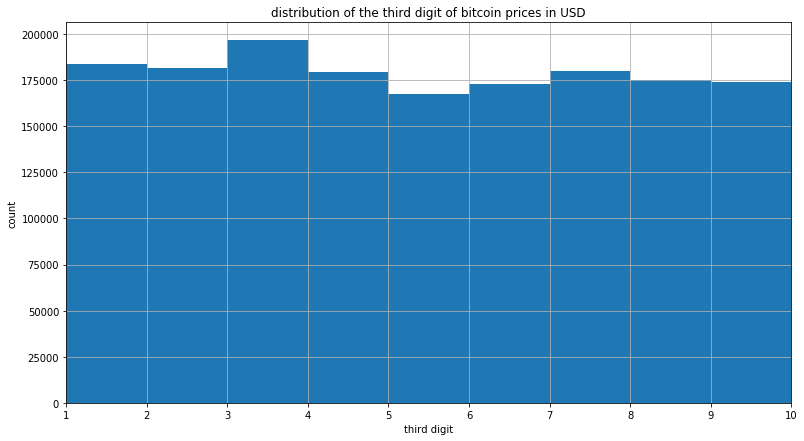

In [20]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig3'], bins = bins)
plt.xlabel('third digit')
plt.ylabel('count')
plt.title('distribution of the third digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

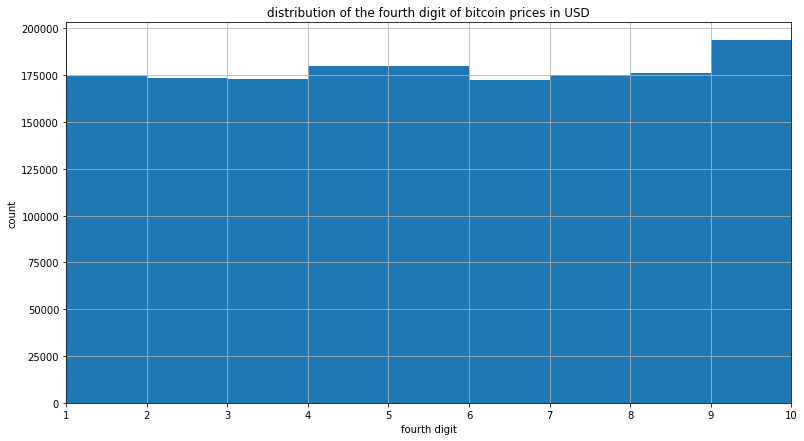

In [21]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig4'], bins = bins)
plt.xlabel('fourth digit')
plt.ylabel('count')
plt.title('distribution of the fourth digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

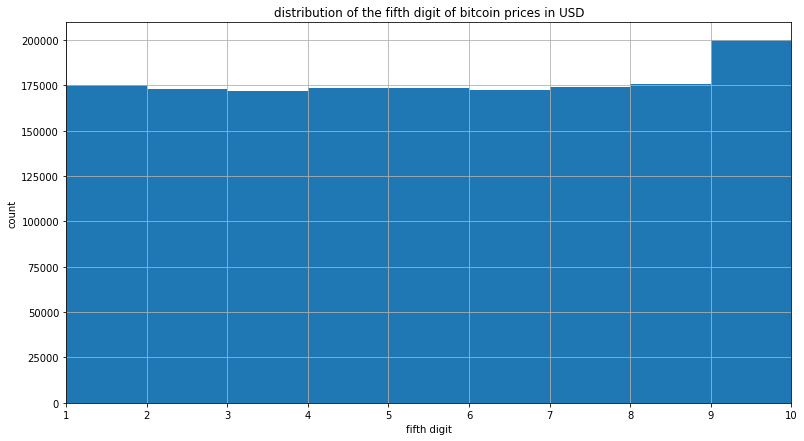

In [22]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig5'], bins = bins)
plt.xlabel('fifth digit')
plt.ylabel('count')
plt.title('distribution of the fifth digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

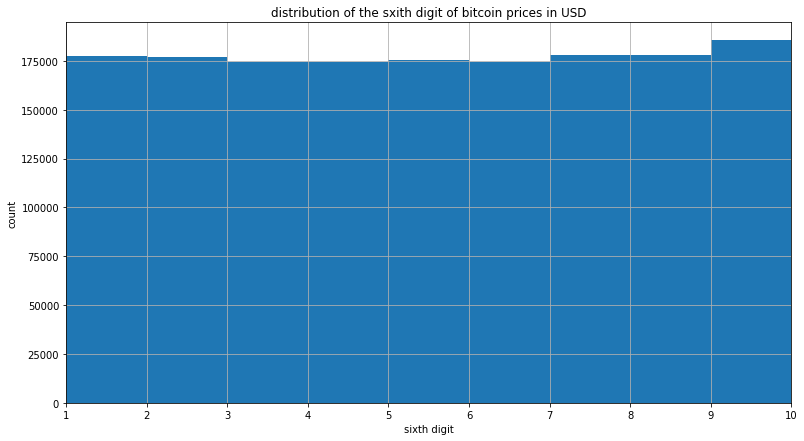

In [23]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,11)
tr_nan = plt.hist(dfx['dig6'], bins = bins)
plt.xlabel('sixth digit')
plt.ylabel('count')
plt.title('distribution of the sxith digit of bitcoin prices in USD');
plt.grid('on')
plt.xlim((1,10));

What if we look at the first two digits?

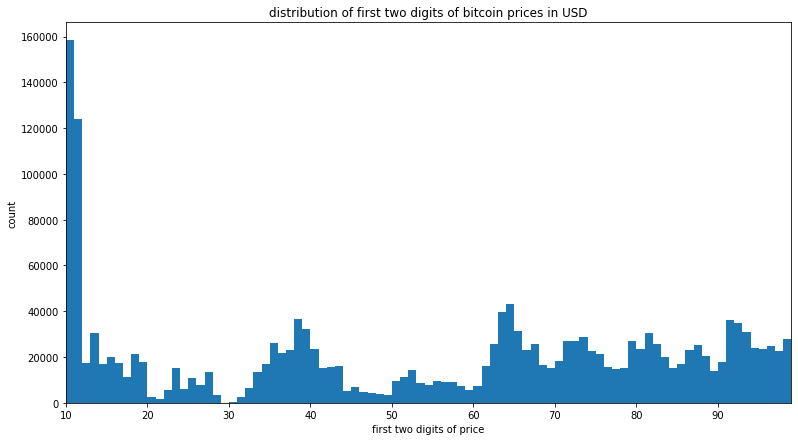

In [24]:
f = plt.figure(figsize=(13,7), facecolor='w')
bins = range(1,100)
tr_nan = plt.hist(dfx['dig12'], bins = bins)
plt.xlabel('first two digits of price')
plt.ylabel('count')
plt.title('distribution of first two digits of bitcoin prices in USD')
plt.xlim(10,99);

The above plot shows that the price has a propensity to hover between starting with '10...' and '15...'

## Time dependence

Do these trends change?

In [25]:
complete_years = range(2012,2020+1)

In [26]:
dfx.tail()

,inds,times,htimes,prices,dig1,dig2,dig12,dig3,dig4,dig5,dig6
1789994,1841395,1609372560,2020-12-30 16:56:00,28806.429798,2,8,28,8,0,6,4
1789995,1841396,1609372620,2020-12-30 16:57:00,28846.441863,2,8,28,8,4,6,4
1789996,1841397,1609372680,2020-12-30 16:58:00,28879.056266,2,8,28,8,7,9,0
1789997,1841398,1609372740,2020-12-30 16:59:00,28893.695831,2,8,28,8,9,3,6
1789998,1841399,1609372800,2020-12-30 17:00:00,28909.166061,2,8,28,9,0,9,1


In [27]:
for yi in range(len(complete_years)):
    pass

## Model and backtest

In [42]:
digit = 4
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000
buysignal = 6
sellsignal = 9

this_df = dfx[dfx['times']> good_data_starts].reset_index()

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == buysignal:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == sellsignal:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2017-11-07 00:25:00] Converted BTC to USD at 7179.88 // total bal in BTC: 0.6283637767794362
[2018-04-16 09:15:00] Converted USD to BTC at 7976.3633279 // total bal in BTC: 0.5612513613664328
[2018-09-19 17:22:00] Converted USD to BTC at 6386.7396321999995 // total bal in BTC: 0.6769902020506604
[2019-01-05 05:52:00] Converted BTC to USD at 3839.1326406999997 // total bal in BTC: 1.3566289344727316
[2019-05-18 21:36:00] Converted USD to BTC at 7896.7875588 // total bal in BTC: 0.9516160722624232
[2019-05-25 20:30:00] Converted USD to BTC at 8066.557826199999 // total bal in BTC: 1.0849992822124248
[2019-09-15 08:42:00] Converted USD to BTC at 10262.471889 // total bal in BTC: 0.9350433436063655
[2020-03-22 16:38:00] Converted BTC to USD at 5949.9029874 // total bal in BTC: 1.0139183993739396
[2020-04-27 15:32:00] Converted USD to BTC at 7736.769983600001 // total bal in BTC: 0.8537704813195562
[2020-05-18 14:26:00] Converted BTC to USD at 9669.9476874 // total bal in BTC: 0.7216841102

Text(0.5, 1.0, 'Balance in BTC over time')

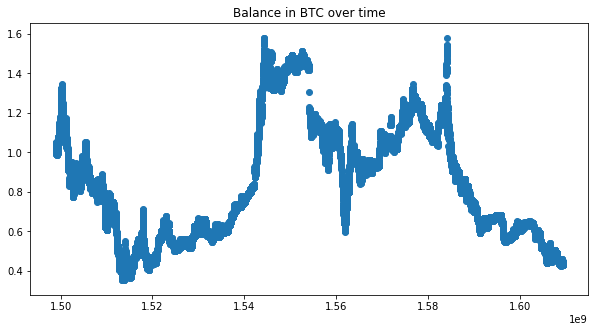

In [43]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')

Text(0.5, 1.0, 'Balance in USD over time')

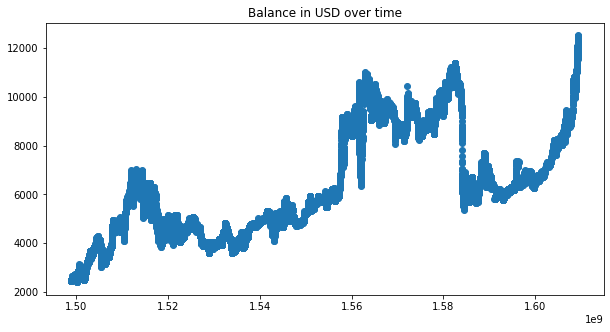

In [44]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(usdtimes, usdbalvec)
plt.title('Balance in USD over time')

5th digit

In [45]:
digit = 5
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000
buysignal = 6
sellsignal = 9

this_df = dfx[dfx['times']> good_data_starts].reset_index()

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == buysignal:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == sellsignal:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2017-07-22 21:44:00] Converted BTC to USD at 2824.9319418 // total bal in BTC: 0.8200918128876957
[2017-07-30 04:45:00] Converted BTC to USD at 2637.9898695 // total bal in BTC: 0.8596063230216531
[2017-08-13 17:27:00] Converted USD to BTC at 4055.6429501999996 // total bal in BTC: 0.7045246555833908
[2017-09-11 01:42:00] Converted USD to BTC at 4171.6487907 // total bal in BTC: 0.7240227467281619
[2017-09-25 06:10:00] Converted USD to BTC at 3757.6276571999997 // total bal in BTC: 0.9592685505395044
[2017-12-04 23:31:00] Converted BTC to USD at 11539.445741 // total bal in BTC: 0.46033079939977417
[2018-03-12 11:36:00] Converted BTC to USD at 9127.999149 // total bal in BTC: 0.38540563357456914
[2018-06-04 02:27:00] Converted BTC to USD at 7591.988143800001 // total bal in BTC: 0.314214997532264
[2018-12-28 11:01:00] Converted BTC to USD at 3864.9307165 // total bal in BTC: 0.5877248341982219
[2019-02-27 16:55:00] Converted USD to BTC at 3797.6664681999996 // total bal in BTC: 0.5501

Text(0.5, 1.0, 'Balance in BTC over time')

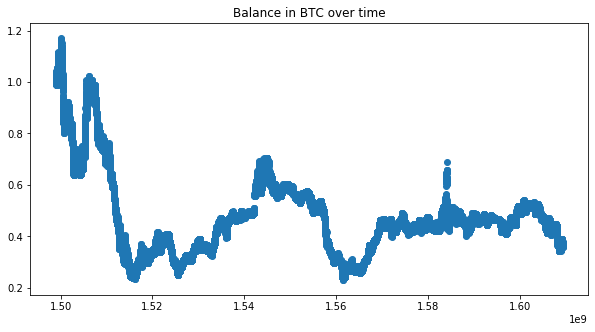

In [46]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')

6th digit

In [47]:
digit = 6
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000
buysignal = 6
sellsignal = 9

this_df = dfx[dfx['times']> good_data_starts].reset_index()

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == buysignal:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == sellsignal:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2017-11-21 00:16:00] Converted USD to BTC at 8077.1623714 // total bal in BTC: 0.7194002294239626
[2017-12-25 20:30:00] Converted BTC to USD at 14002.978772 // total bal in BTC: 0.4263133122862142
[2018-03-12 11:36:00] Converted BTC to USD at 9127.999149 // total bal in BTC: 0.2979903425271987
[2018-04-16 09:15:00] Converted USD to BTC at 7976.3633279 // total bal in BTC: 0.34607431220155777
[2018-07-09 03:07:00] Converted USD to BTC at 6714.165451700001 // total bal in BTC: 0.40953554480727655
[2018-07-30 04:33:00] Converted BTC to USD at 8146.1971198 // total bal in BTC: 0.40555109342070095
[2018-08-27 22:34:00] Converted USD to BTC at 6892.56 // total bal in BTC: 0.4474159654384027
[2018-09-04 09:58:00] Converted USD to BTC at 7373.7666523 // total bal in BTC: 0.43243964362213794
[2019-01-20 14:53:00] Converted BTC to USD at 3539.7985744000002 // total bal in BTC: 0.6041101870909898
[2019-01-28 10:59:00] Converted USD to BTC at 3413.56 // total bal in BTC: 0.5869100206970784
[2019-

Text(0.5, 1.0, 'Balance in BTC over time')

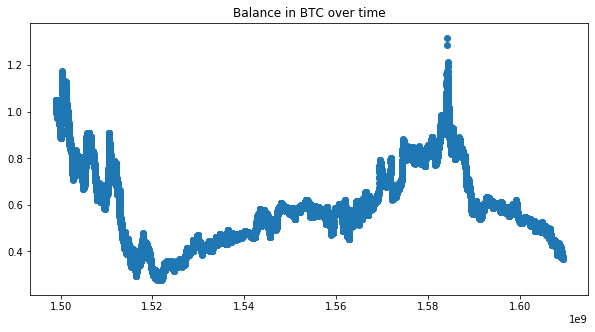

In [48]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')

In [49]:
digit = 6
btcbal = 1
btcbalvec = list()
btctimes = list()
usdbal = 0
usdbalvec = list()
usdtimes = list()
q_verbose = 10000
buysignal = 9
sellsignal = 6

this_df = dfx[dfx['times']> good_data_starts].reset_index()

for ti in range(len(this_df)):
    this_price = this_df['prices'][ti]
    this_time = this_df['times'][ti]
    this_htime = this_df['htimes'][ti]
    
    if dfx['dig' + str(digit)][ti] == buysignal:
        # Buy BTC with USD
        if usdbal > 0:
            btcbal = usdbal/this_price
            usdbal = 0
            
            btctimes.append(this_time)
            btcbalvec.append(btcbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted USD to BTC at ' + str(this_price) + ' // total bal in BTC: ' + str(btcbal))
                
                
    elif dfx['dig' + str(digit)][ti] == sellsignal:
        # Sell BTC for USD
        if btcbal > 0:
            cachebal = btcbal
            usdbal = btcbal*this_price
            btcbal = 0
            
            usdtimes.append(this_time)
            usdbalvec.append(usdbal)
            
            if (q_verbose > 0) and (ti % q_verbose == 0):
                print('['+str(this_htime)+'] Converted BTC to USD at ' + str(this_price) + ' // total bal in BTC: ' + str(cachebal))

[2017-11-21 00:16:00] Converted BTC to USD at 8077.1623714 // total bal in BTC: 0.424950172717931
[2017-12-25 20:30:00] Converted USD to BTC at 14002.978772 // total bal in BTC: 0.41363575327610425
[2018-03-12 11:36:00] Converted USD to BTC at 9127.999149 // total bal in BTC: 0.9077988226255259
[2018-04-16 09:15:00] Converted BTC to USD at 7976.3633279 // total bal in BTC: 0.8945262775662656
[2018-07-09 03:07:00] Converted BTC to USD at 6714.165451700001 // total bal in BTC: 0.8980153392026663
[2018-07-30 04:33:00] Converted USD to BTC at 8146.1971198 // total bal in BTC: 0.7474237675156541
[2018-08-27 22:34:00] Converted BTC to USD at 6892.56 // total bal in BTC: 0.8007102036491812
[2018-09-04 09:58:00] Converted BTC to USD at 7373.7666523 // total bal in BTC: 0.774377105837394
[2019-01-20 14:53:00] Converted USD to BTC at 3539.7985744000002 // total bal in BTC: 1.1547093599190739
[2019-01-28 10:59:00] Converted BTC to USD at 3413.56 // total bal in BTC: 1.2325039791139434
[2019-04-06

Text(0.5, 1.0, 'Balance in BTC over time')

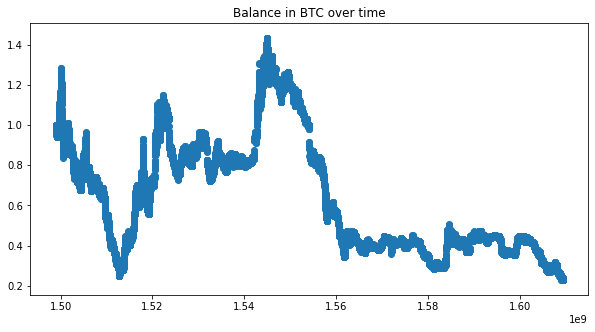

In [50]:
f = plt.figure(figsize=(10,5), facecolor='w')
plt.scatter(btctimes, btcbalvec)
plt.title('Balance in BTC over time')